### Piont data anlysis
This script will walk you through the basic point data anlysis using Tethys library. The scripts below includes retrieving data from envlib.org, plotting composite averages, plotting statistical distributions using violin plots and windrose for wind data.

#### import libraries

In [1]:
from tethysts import Tethys
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from envlib_helper import *

The line below initiates the Tethys instance (service) before retrieving data from the server.

In [2]:
ts = Tethys()

We can get information of all the available datasets on [envlib.org](https://www.envlib.org) using the following line. This will save an excel file called "envlib_data_catalog.xlsx" in the current Jupyter environment. Once created, you can download to your own computer and find the information you need in the later process to retrieve any specific data.
You can also check the [web GUI](https://wai.tethys-ts.xyz) for all the information.

In [3]:
get_all_dataset_information(ts)

dataset_id  \
feature    parameter           owner                                                    
atmosphere barometric_pressure ECMWF                         8e448e4d20d8ce8a6efd6c93   
                               Met Solutions                 5bcc41cb5dd58b9d8f4b06e7   
                               NZ Open Modelling Consortium  07baf6c222cdad8ed2b14188   
                               NZ Open Modelling Consortium  4efe1d619e198cf24e799559   
                               NZ Open Modelling Consortium  58f291148cb4bed837252412   
...                                                                               ...   
waterway   temperature         Environment Canterbury        73ab8b02fc65686636eb6d0b   
                               Environment Canterbury        e377832782edebee05c8f2e1   
           water_use           Environment Southland         fde8d7496cb5cda74b8bbe8d   
                               Environment Southland         0a91ee3135dca335d7300894   
                               Environment Southland         7cc8b402e168885ef69870ed   

                                                                       method  \
feature    parameter           owner                                            
atmosphere barometric_pressure ECMWF                               simulation   
                               Met Solutions                       simulation   
                               NZ Open Modelling Consortium        simulation   
                               NZ Open Modelling Consortium        simulation   
                               NZ Open Modelling Consortium        simulation   
...                                                                       ...   
waterway   temperature         Environment Canterbury        sensor_recording   
                               Environment Canterbury          field_activity   
           water_use           Environment Southland               simulation   
                               Environment Southland               simulation   
                               Environment Southland               simulation   

                                                                                              product_code  \
feature    parameter           owner                                                                         
atmosphere barometric_pressure ECMWF                                                  reanalysis-era5-land   
                               Met Solutions                         WRF NZ South Island Central Otago 3km   
                               NZ Open Modelling Consortium    UC WRF NZ South Island North Canterbury 1km   
                               NZ Open Modelling Consortium       UC WRF NZ South Island Central Otago 1km   
                               NZ Open Modelling Consortium  UC WRF NZ South Island Marlborough Nelson 1km   
...                                                                                                    ...   
waterway   temperature         Environment Canterbury                              quality_controlled_data   
                               Environment Canterbury                              quality_controlled_data   
           water_use           Environment Southland                             stream depletion method 1   
                               Environment Southland                               WAP allocation method 1   
                               Environment Southland                                   estimation method 1   

                                                            aggregation_statistic  \
feature    parameter           owner                                                
atmosphere barometric_pressure ECMWF                                instantaneous   
                               Met Solutions                        instantaneous   
                               NZ Open Modelling Consortium         instantaneous   
       

#### Retrive a point data

You can use various ways to retrive time series from any point locations (AWS statoin observation, WRF simulation etc.). The code below demenstrates a most commonly way of retriving a dataset from the closiest lat and lon. The below example will retrieve all tier1 datasets from a FENZ AWS.

In [4]:
owner = "FENZ"
method = "sensor_recording"
product_code = "raw_data"
lat = -43.47
lon = 171.672

In [5]:
station_data=get_data_from_lat_lon(ts,owner,method,product_code,lat,lon)

In [6]:
station_data

<xarray.Dataset>
Dimensions:                   (time: 196612)
Coordinates:
  * time                      (time) datetime64[ns] 1999-06-14 ... 2021-11-17...
    geometry                  <U42 '01010000002FDD2406817565405C8FC2F528BC45C0'
    height                    int8 2
Data variables:
    externalId                object ...
    station_id                object ...
    ref                       object ...
    name                      object ...
    wind_speed                (time) float32 ...
    lat                       float64 ...
    lon                       float64 ...
    relative_humidity         (time) float32 86.0 87.5 88.5 ... 97.3 95.4 87.0
    volumetric_water_content  (time) float32 nan nan nan nan ... 30.0 30.0 30.0
    wind_direction            (time) float32 nan 187.0 51.5 ... 36.4 156.8 189.2
    precipitation             (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    temperature               (time) float32 5.4 5.4 5.3 4.8 ... 4.7 4.7 6.6 9.7
Attributes:
    featureType:  timeSeries
    title:        mean wind_speed in m/s of the atmosphere by a sensor_record...
    institution:  FENZ
    license:      https://creativecommons.org/licenses/by/4.0/
    source:       sensor_recording
    history:      20211024T200003Z: Generated
    version:      3

### Composite average anlysis 

Composite average is commonly used for climatological anlysis.

In [7]:
plot_data = station_data.sel(time=slice("2020-01-01", "2021-12-31")) # change the data range accordingly

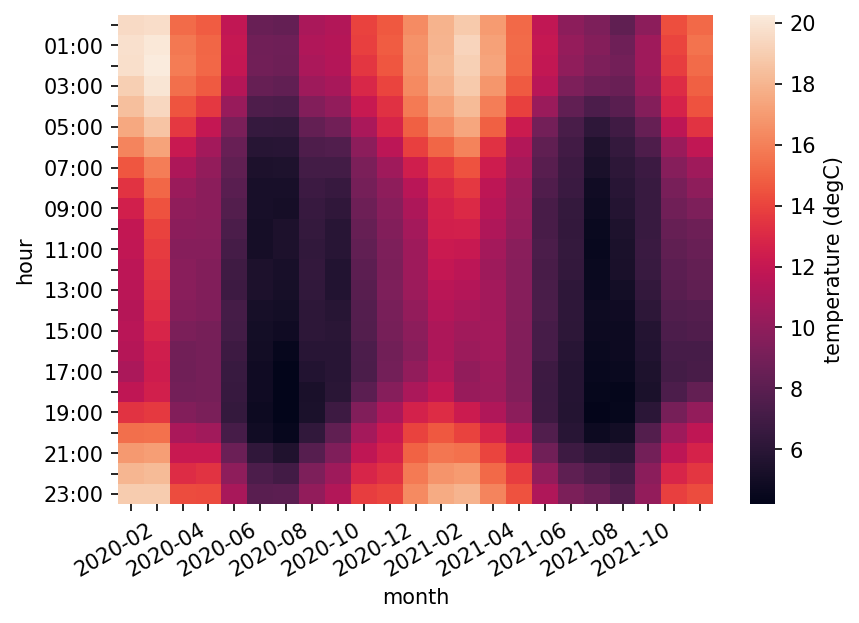

In [8]:
plot_hourly_composite(plot_data["temperature"],time_zone='UTC',average="month")

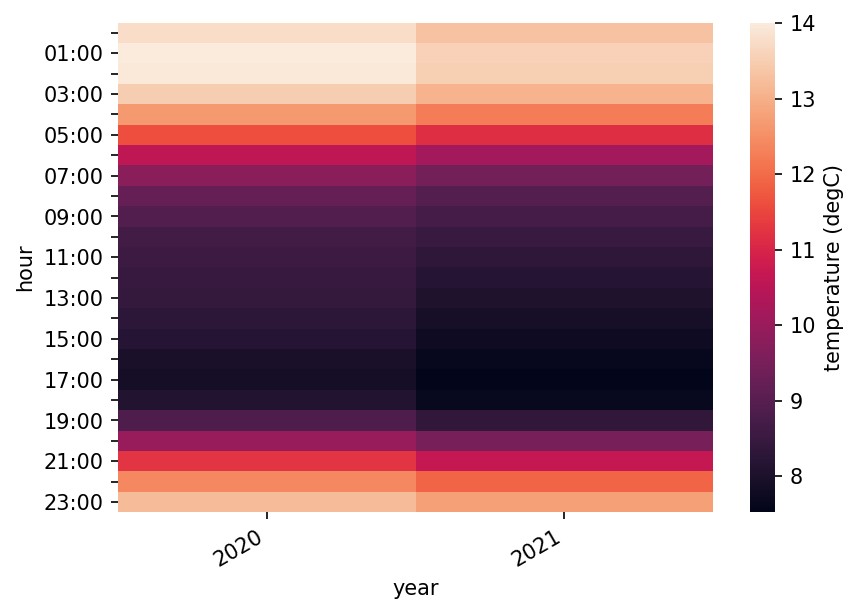

In [9]:
plot_hourly_composite(plot_data["temperature"],time_zone='UTC',average="year")

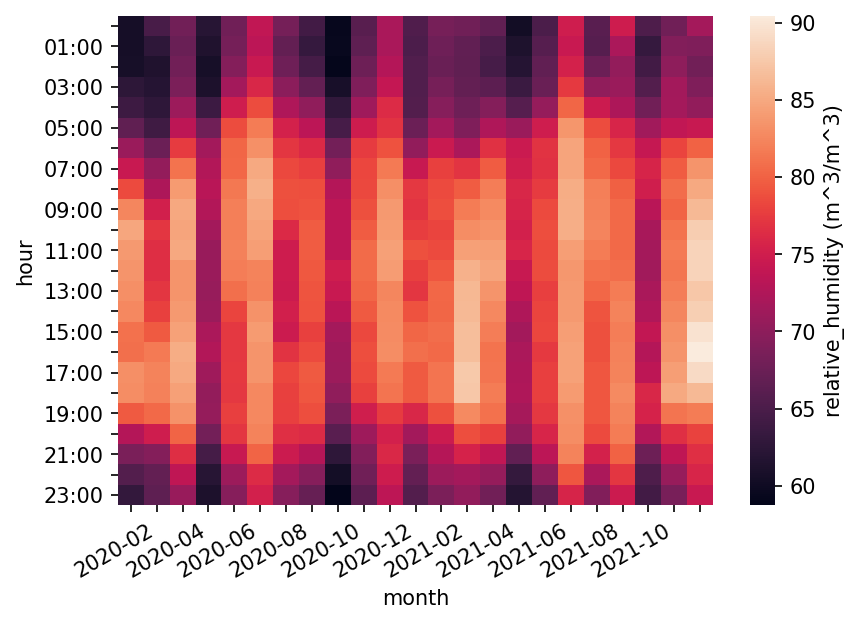

In [10]:
plot_hourly_composite(plot_data["relative_humidity"],time_zone='UTC',average="month",save_fig=True,save_files=True)

### violin plot

#### select time period

In [11]:
plot_data = station_data.sel(time=slice("2020-01-01", "2021-12-31")) # change the data range accordingly

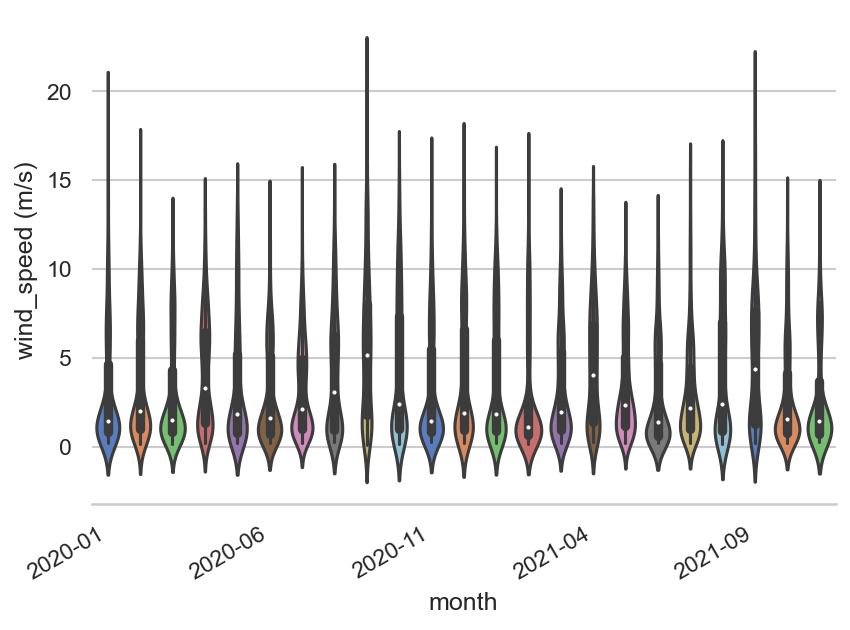

In [12]:
plot_violinplot(plot_data["wind_speed"],"month",save_fig=True,save_files=True)

#### Windrose

In [13]:
plot_data = station_data.sel(time=slice("2020-01-01", "2021-12-31")) # change the data range accordingly

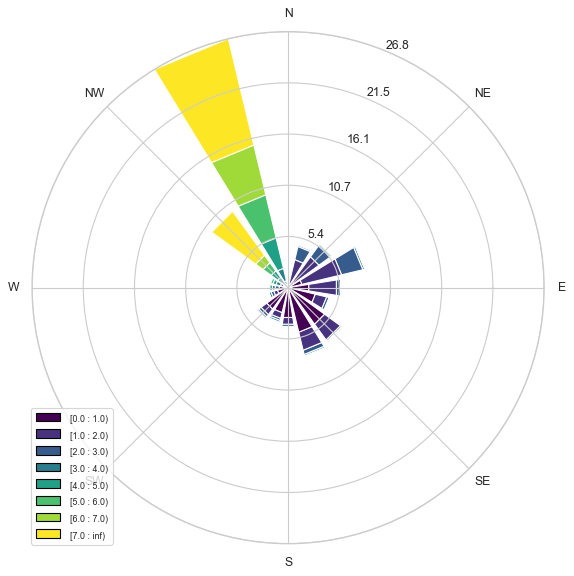

In [15]:
plot_wind_rose(plot_data.wind_speed,plot_data.wind_direction,save_fig=True)